In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data={'Max' : (39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25),
'Min' : (21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18)}
df= pd.DataFrame(data)
df['Month']=np.arange(1,13)

In [3]:
df

,Max,Min,Month
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5
5,51,35,6
6,45,31,7
7,38,28,8
8,37,21,9
9,29,19,10


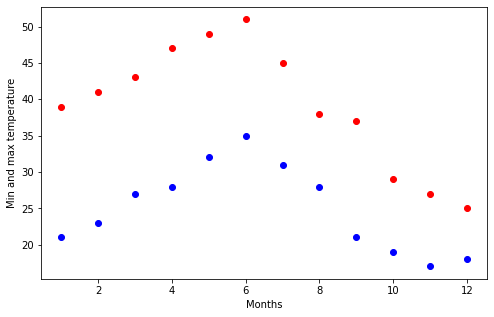

In [4]:
plt.figure(figsize=(8,5))
plt.plot(range(1,13),df['Max'],'ro')
plt.plot(range(1,13),df['Min'],'bo')
plt.xlabel('Months')
plt.ylabel('Min and max temperature')
ax=plt.show

In [5]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, _ = optimize.curve_fit(yearly_temps, df['Month'],df['Max'], [20, 10, 0])
res_min, _ = optimize.curve_fit(yearly_temps,  df['Month'],df['Min'], [-40, 20, 0])

Text(0, 0.5, 'Temperature')

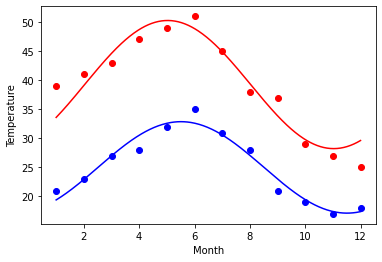

In [6]:
days = np.linspace(1, 12, num=365)

plt.figure()
plt.plot(df['Month'], df['Max'], 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(df['Month'], df['Min'], 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

# Matplotlib

In [7]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [8]:
titanic



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


([<matplotlib.patches.Wedge at 0x2108fc3f2e0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

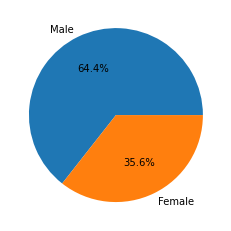

In [9]:
plt.pie(titanic['sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')

In [10]:
gender = titanic['sex'].astype('category')
gender=gender.cat.codes

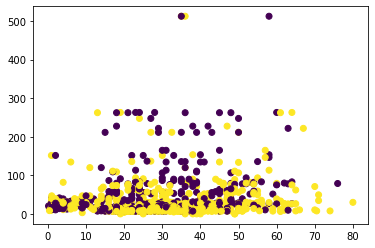

In [11]:
plt.scatter(x=titanic['age'],y=titanic['fare'],c=gender)

<AxesSubplot:xlabel='age', ylabel='fare'>

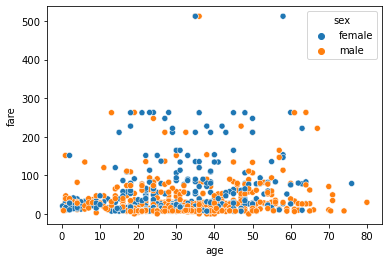

In [12]:
sns.scatterplot(x=titanic['age'],y=titanic['fare'],hue=titanic['sex'])